In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install sweetviz

# **Importing necessary libraries for visualizations**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
import plotly
import numpy as np
import cufflinks as cf

# Inputting data from Google Drive

In [ ]:
data=pd.read_csv('/content/drive/My Drive/data.csv.zip',compression='zip')

In [ ]:
data.head()

acousticness                                   artists  ...  valence  year
0         0.995                       ['Carl Woitschach']  ...   0.7790  1928
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']  ...   0.0767  1928
2         0.604                   ['Seweryn Goszczyński']  ...   0.8800  1928
3         0.995                      ['Francisco Canaro']  ...   0.7200  1928
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']  ...   0.0693  1928

[5 rows x 19 columns]

In [ ]:
print(data.shape)
print(data.columns)

(169909, 19)
Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


### We see that we have 1.69M rows of data with 16 unique attributes of the song. We have 16 columns like acousticness, danceability, energy, liveliness and so on.

# Getting a brief look at the data we have in hand using 'SWEETVIZ' Library.

In [ ]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Seperating Numerical and Categorical columns

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [ ]:
print('numerical columns are:\n{}'.format(numeric_data.columns))
print('Categorical columns are:\n{}'.format(categorical_data.columns))

numerical columns are:
Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')
Categorical columns are:
Index(['artists', 'id', 'name', 'release_date'], dtype='object')


## Vizualizations on the Numeric Data

In [ ]:
numeric_data.describe()

acousticness   danceability  ...        valence           year
count  169909.000000  169909.000000  ...  169909.000000  169909.000000
mean        0.493214       0.538150  ...       0.532095    1977.223231
std         0.376627       0.175346  ...       0.262408      25.593168
min         0.000000       0.000000  ...       0.000000    1921.000000
25%         0.094500       0.417000  ...       0.322000    1957.000000
50%         0.492000       0.548000  ...       0.544000    1978.000000
75%         0.888000       0.667000  ...       0.749000    1999.000000
max         0.996000       0.988000  ...       1.000000    2020.000000

[8 rows x 15 columns]

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=numeric_data['acousticness'],name='Acousticness'))
fig.add_trace(go.Box(y=numeric_data['energy'],name='Energy'))
fig.add_trace(go.Box(y=numeric_data['danceability'],name='Danceability'))
fig.add_trace(go.Box(y=numeric_data['liveness'],name='liveness'))
fig.show()

We observe that columns like Acousticness and energy dont have ouliers whereas columns like Danceability and Liveness have a lot of outliers

In [ ]:
fig = go.Figure(go.Box(y=numeric_data['popularity'],name='Popularity'))
fig.show()


In [ ]:
fig = go.Figure(go.Scatter(y=numeric_data['popularity'],name='Popularity'))
fig.show()

In [ ]:
fig = go.Figure(go.Histogram(x=numeric_data['year']))
fig.show()

## Categorical Variables

In [ ]:
categorical_data.columns

Index(['artists', 'id', 'name', 'release_date'], dtype='object')

In [ ]:
print(categorical_data['artists'].nunique())

33375


We find that we have 33375 unique artists in our dataset.

In [ ]:
n_artists=categorical_data['artists'].value_counts().head(10)
print(n_artists)

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
['Johnny Cash']            502
['The Beach Boys']         491
['Elvis Presley']          488
Name: artists, dtype: int64


We find that artists like 'Эрнест Хемингуэй' top the table with 1215 songs followed by 'Francisco Canaro' with 938 songs and 'Эрих Мария Ремарк' with 781 songs.

In [ ]:
fig = go.Figure(go.Bar(y=n_artists,name='Artists VS Number of songs'))
fig.show()

## Correlation Plots

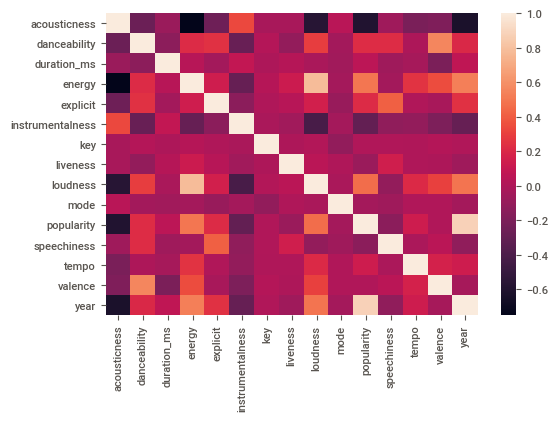

In [ ]:
corrMatrix=numeric_data.corr()
sns.heatmap(corrMatrix)
plt.show()

We find that features like energy, loudness, valence, popularity and danceability are highly correlated.